In [1]:
import os
import numpy as np
from base import *
from base.train_segmentation_model_cnns import train_segmentation_model_cnns

In [2]:
pth = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI'
pthim = os.path.join(pth, '5x')
pthDL = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI\CNNs_same_dataset'
pthtest = os.path.join(pth, 'test')
pthtestim = os.path.join(pthtest, '5x')

______________DeepLabV3_plus_______________
Testing segmentation model......
 
Importing annotation data...
 
 Making downsampled images...
Image 1 of 1: TVWT 2-2 2
 annotation data previously loaded
   
  Starting classification of image 1 of 1: TVWT 2-2 2.tif
Image 1 of 1 took 10 s
  Total time for classification: 0.0h 0.0m 27.710785388946533s


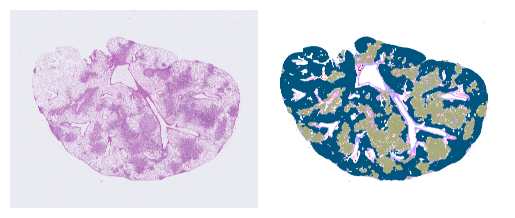


Calculating total number of pixels in the testing dataset...
  There are 45046 pixels of bronchioles, 23% of the most common class.
  There are 115507 pixels of alveoli, 60% of the most common class.
  There are 34798 pixels of vasculature, 18% of the most common class.
  There are 127195 pixels of mets, 66% of the most common class.
  There are 191199 pixels of whitespace. This is the most common class.
  There are 18246 pixels of collagen, 9% of the most common class.


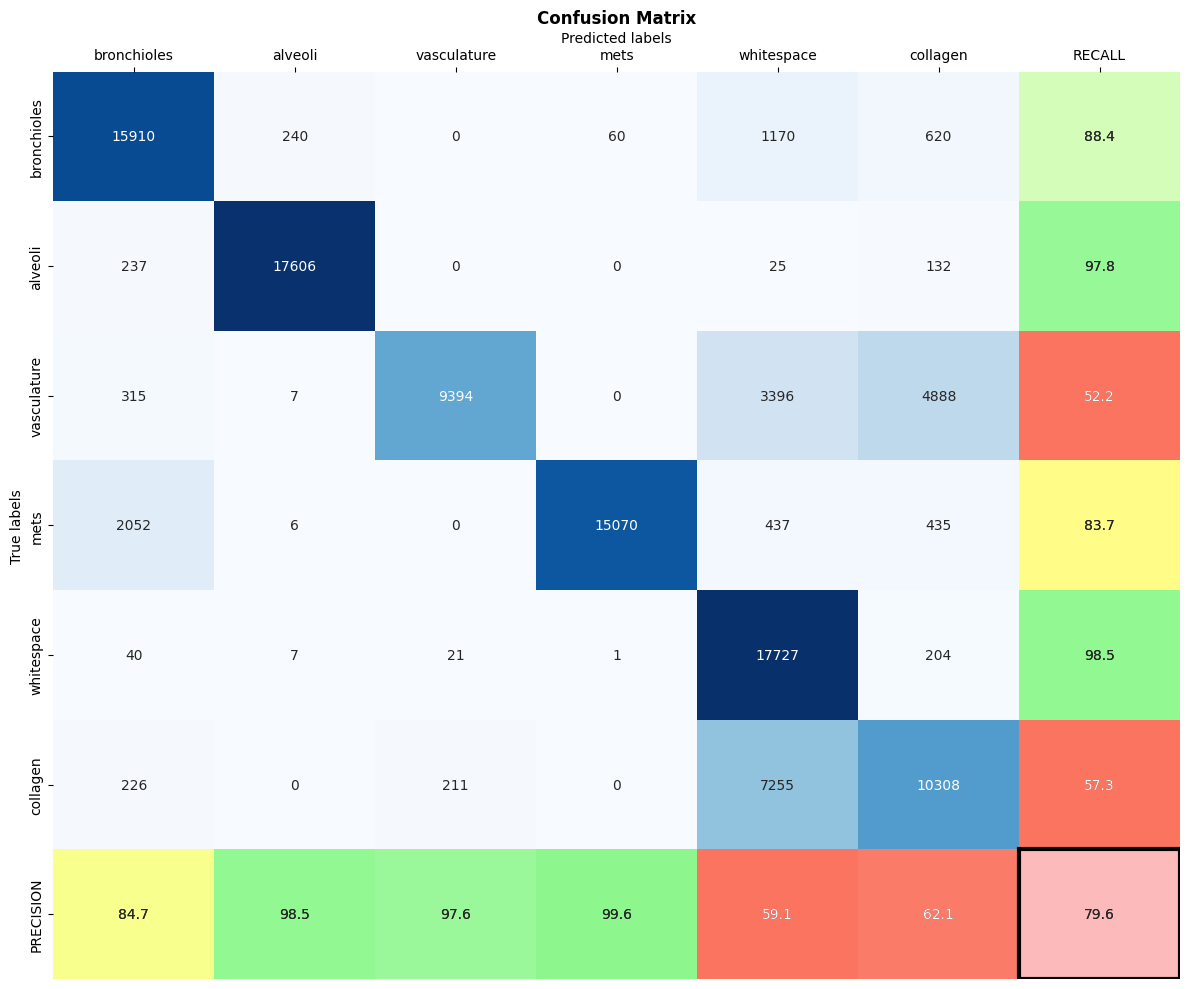


Confusion matrix saved to \\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI\CNNs_same_dataset\confusion_matrix.jpg

Overall Accuracy: 79.6%
__________________________________________
______________UNet3_plus_______________
Testing segmentation model......
 
Importing annotation data...
 
 Making downsampled images...
Image 1 of 1: TVWT 2-2 2
 annotation data previously loaded
   
  Starting classification of image 1 of 1: TVWT 2-2 2.tif
Image 1 of 1 took 13 s
  Total time for classification: 0.0h 0.0m 21.87781596183777s


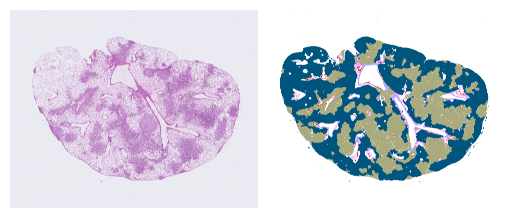


Calculating total number of pixels in the testing dataset...
  There are 45046 pixels of bronchioles, 23% of the most common class.
  There are 115507 pixels of alveoli, 60% of the most common class.
  There are 34798 pixels of vasculature, 18% of the most common class.
  There are 127195 pixels of mets, 66% of the most common class.
  There are 191199 pixels of whitespace. This is the most common class.
  There are 18246 pixels of collagen, 9% of the most common class.


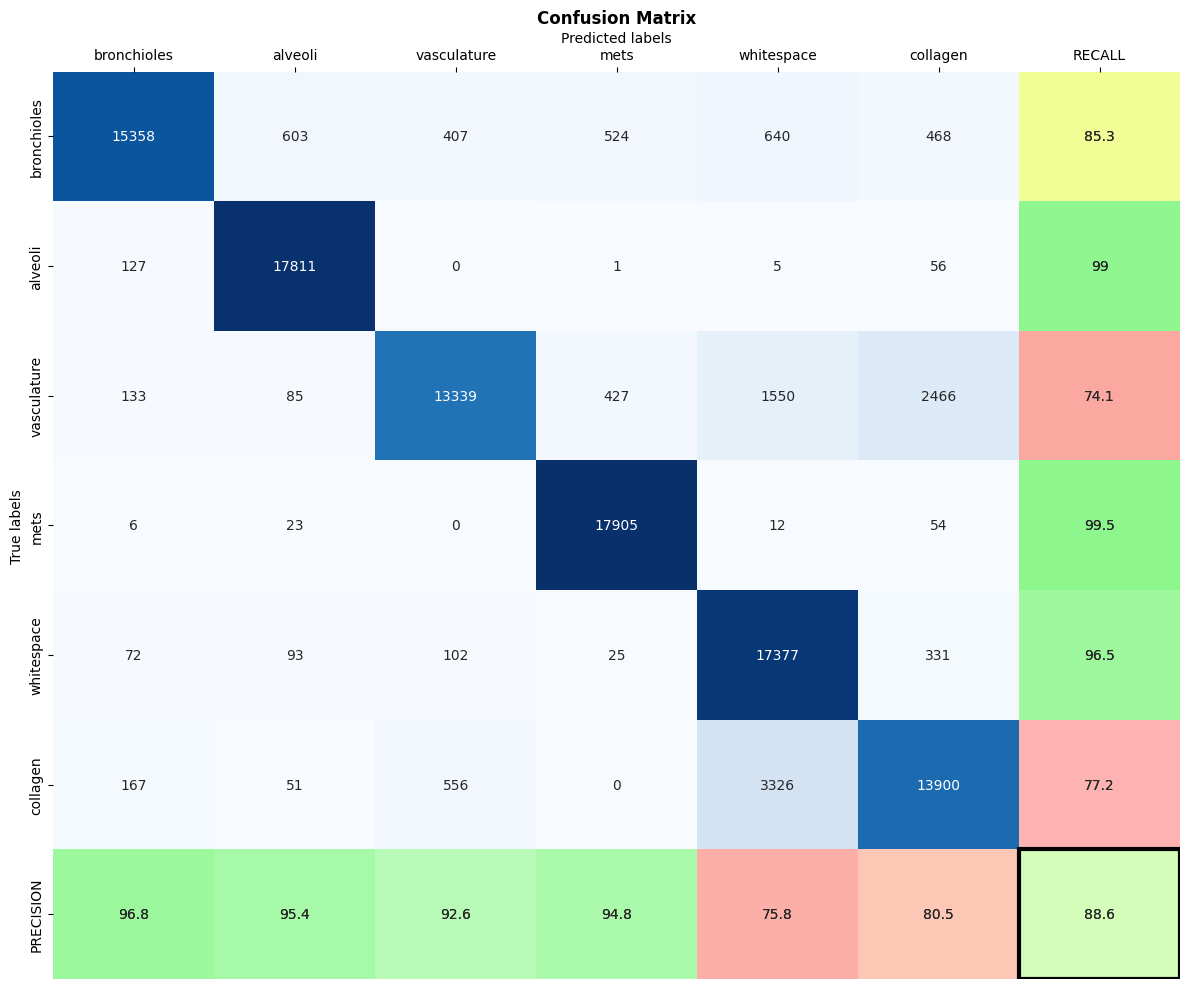


Confusion matrix saved to \\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI\CNNs_same_dataset\confusion_matrix.jpg

Overall Accuracy: 88.6%
__________________________________________
______________TransUNet_______________
Testing segmentation model......
 
Importing annotation data...
 
 Making downsampled images...
Image 1 of 1: TVWT 2-2 2
 annotation data previously loaded
   
  Starting classification of image 1 of 1: TVWT 2-2 2.tif
Image 1 of 1 took 16 s
  Total time for classification: 0.0h 0.0m 25.99068260192871s


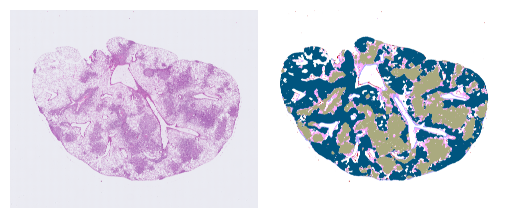


Calculating total number of pixels in the testing dataset...
  There are 45046 pixels of bronchioles, 23% of the most common class.
  There are 115507 pixels of alveoli, 60% of the most common class.
  There are 34798 pixels of vasculature, 18% of the most common class.
  There are 127195 pixels of mets, 66% of the most common class.
  There are 191199 pixels of whitespace. This is the most common class.
  There are 18246 pixels of collagen, 9% of the most common class.


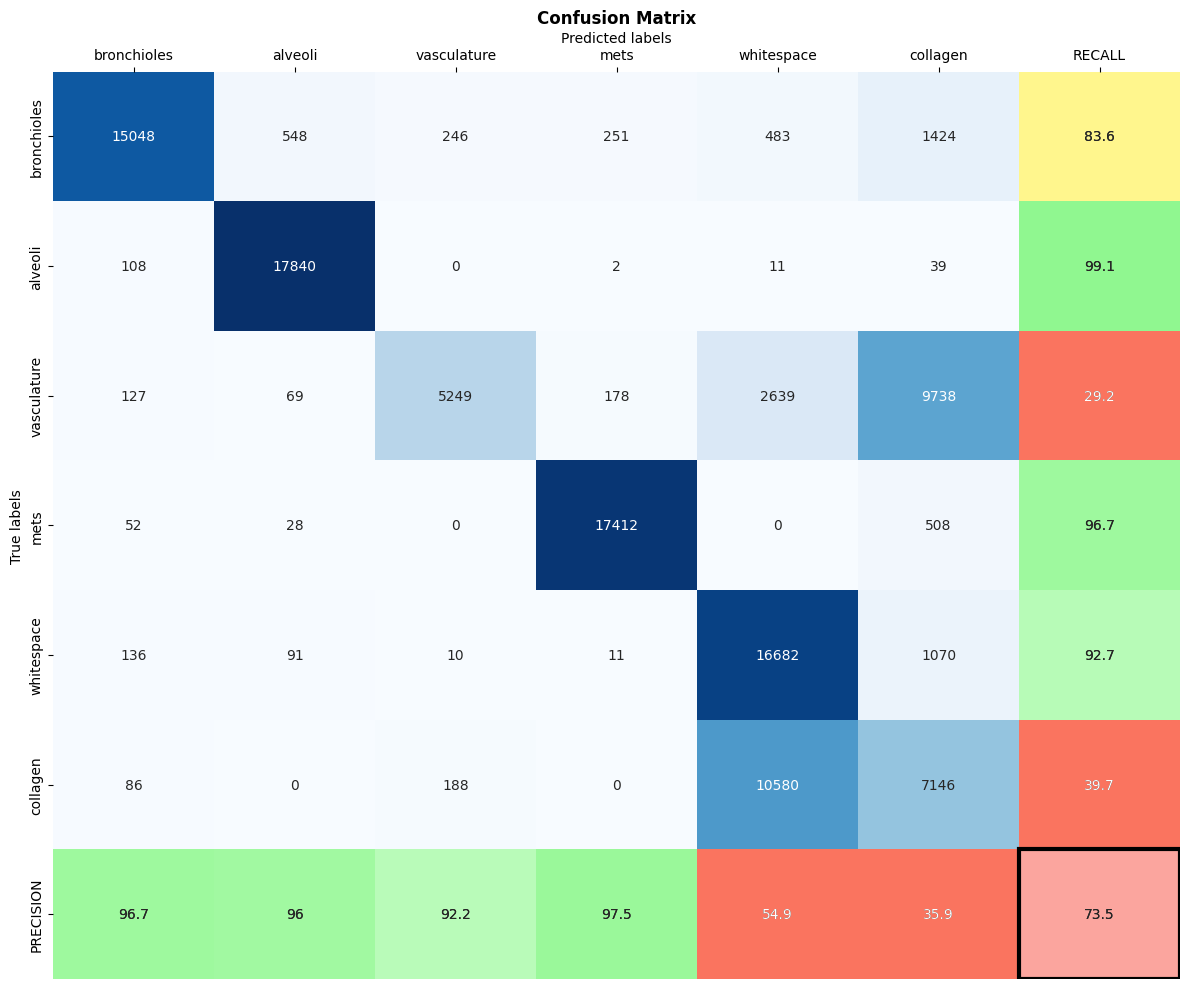


Confusion matrix saved to \\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI\CNNs_same_dataset\confusion_matrix.jpg

Overall Accuracy: 73.5%
__________________________________________
______________CASe_UNet_______________
Testing segmentation model......
 
Importing annotation data...
 
 Making downsampled images...
Image 1 of 1: TVWT 2-2 2
 annotation data previously loaded
   
  Starting classification of image 1 of 1: TVWT 2-2 2.tif
Image 1 of 1 took 15 s
  Total time for classification: 0.0h 0.0m 26.404117345809937s


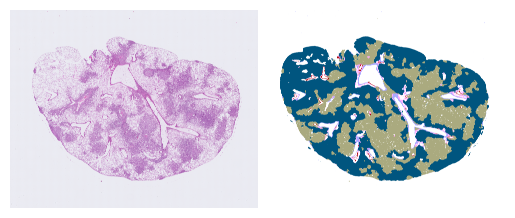


Calculating total number of pixels in the testing dataset...
  There are 45046 pixels of bronchioles, 23% of the most common class.
  There are 115507 pixels of alveoli, 60% of the most common class.
  There are 34798 pixels of vasculature, 18% of the most common class.
  There are 127195 pixels of mets, 66% of the most common class.
  There are 191199 pixels of whitespace. This is the most common class.
  There are 18246 pixels of collagen, 9% of the most common class.


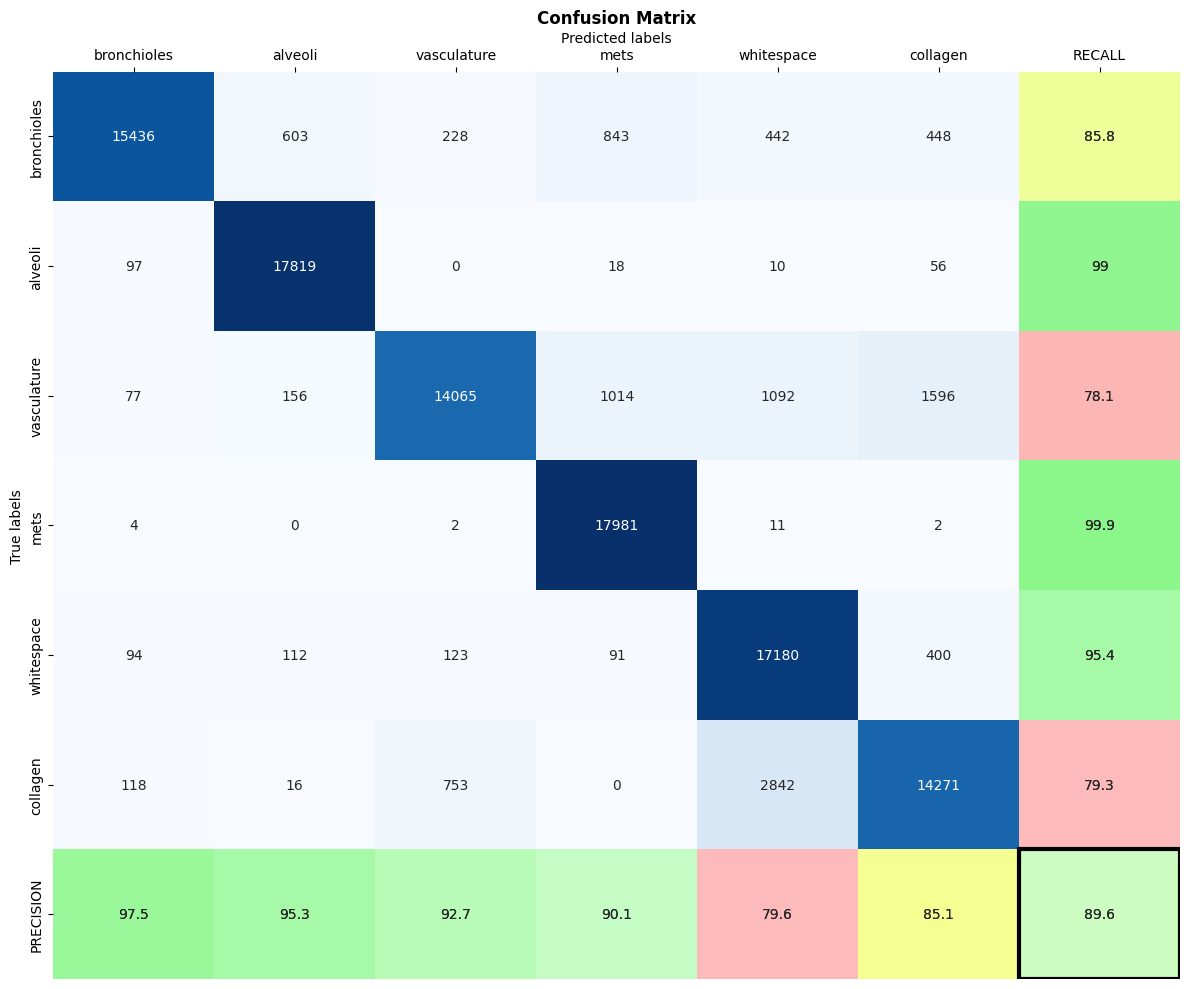


Confusion matrix saved to \\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI\CNNs_same_dataset\confusion_matrix.jpg

Overall Accuracy: 89.6%
__________________________________________


In [3]:
# CNNs = ["DeepLabV3_plus"]
# CNNs = ["DeepLabV3+","UNet3+","TransUNet","CASe_UNet","UNet"]
CNNs = ["DeepLabV3_plus","UNet3_plus","TransUNet","CASe_UNet"]

#Train test and classify an image for each CNN
for cnn_name in CNNs:
    print(f'______________{cnn_name}_______________')
    # train_segmentation_model(pthDL)
    # train_segmentation_model_cnns(pthDL,cnn_name)
    test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name)
    # classify_images(pthim,pthDL, cnn_name)
    print(f'__________________________________________')

In [ ]:
#load net.pkl data
import pickle
with open(os.path.join(pthDL,'net.pkl'), 'rb') as f:
    data = pickle.load(f)
    print(f'name: {data["nm"]}')

newname = 'tinaflowing'

data['nm'] = newname
with open(os.path.join(pthDL,'net.pkl'), 'wb') as f:
    pickle.dump(data, f)
    